In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:
car_data = pd.read_csv('car data.csv')

In [5]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# checking for number of rows and columns
car_data.shape

(301, 9)

In [7]:
# getting some information about the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# finding missing values 
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())
print(car_data.Owner.value_counts())



Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64


In [10]:
# encoding the categorical data
# encoding Fuel Type 
car_data.replace({"Fuel_Type":{'Petrol':0, 'Diesel':1,'CNG':2}},inplace=True)


# encoding Seller Type 
car_data.replace({"Seller_Type":{'Dealer':0, 'Individual':1}},inplace=True)


# encoding Transmission Type 
car_data.replace({"Transmission":{'Manual':0, 'Automatic':1}},inplace=True)

C:\Users\sumir\AppData\Local\Temp\ipykernel_4248\1945901032.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({"Fuel_Type":{'Petrol':0, 'Diesel':1,'CNG':2}},inplace=True)
C:\Users\sumir\AppData\Local\Temp\ipykernel_4248\1945901032.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({"Seller_Type":{'Dealer':0, 'Individual':1}},inplace=True)
C:\Users\sumir\AppData\Local\Temp\ipykernel_4248\1945901032.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fut

In [11]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
# Splitting the data and target
x = car_data.drop(['Car_Name','Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [13]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [14]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [15]:
# Splitting training and test data
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.1, random_state=2)

In [16]:
# Model Training
# Linear regression
#loadind the linear regression model
lr_model=LinearRegression()

In [17]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [18]:
# Model evaluation
# Prediction on Training data
training_data_prediction=lr_model.predict(x_train)

In [19]:
# R squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared error :", error_score)

R squared error : 0.8799451660493699


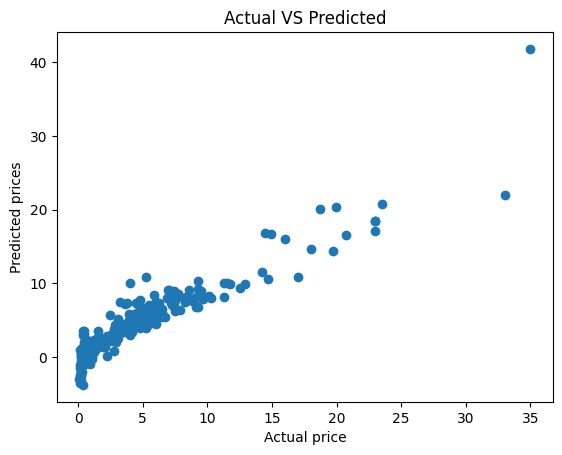

In [20]:
# Visualise the actual preices and predicted prices
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted prices")
plt.title("Actual VS Predicted")
plt.show()

In [21]:
# Prediction on Test data
test_data_prediction=lr_model.predict(x_test)

In [22]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.8365766715026473


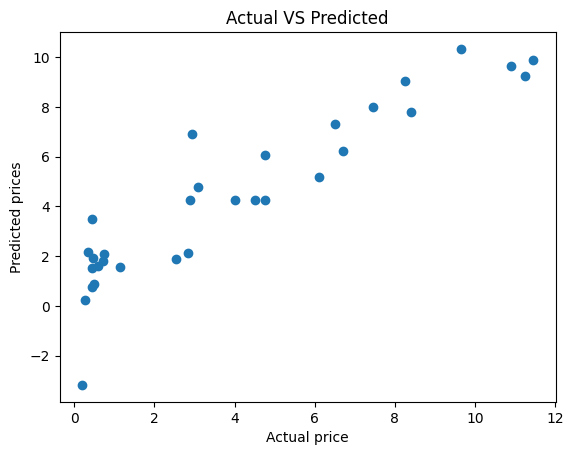

In [23]:
# Visualise the actual preices and predicted prices
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted prices")
plt.title("Actual VS Predicted")
plt.show()

In [40]:
lr_model.predict(pd.DataFrame([[2011,5.50,60000,0,1,0,0]], columns=['Year',  'Present_Price',  'Kms_Driven',  'Fuel_Type',  'Seller_Type',  'Transmission','Owner']))

array([1.34494984])

In [25]:
# Lasso regression
# Model Training
# Lasso regression
#loadind the linear regression model
lsr_model=Lasso()
lsr_model.fit(x_train, y_train)

Lasso()

In [26]:
# Model evaluation
# Prediction on Training data
training_data_prediction=lsr_model.predict(x_train)


In [27]:
# R squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared error :", error_score)


R squared error : 0.8427856123435795


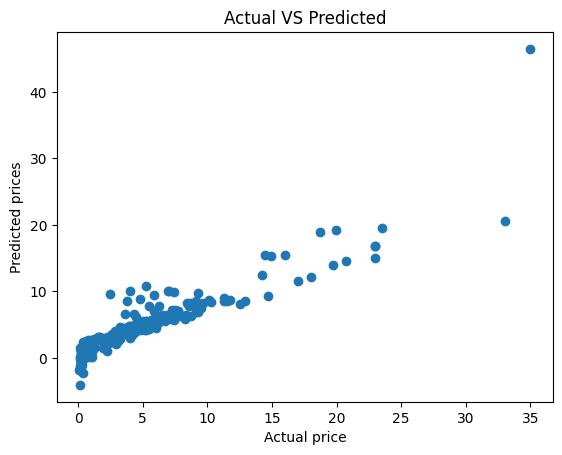

In [28]:
# Visualise the actual preices and predicted prices
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted prices")
plt.title("Actual VS Predicted")
plt.show()

In [29]:
# Prediction on Test data
test_data_prediction=lsr_model.predict(x_test)


In [30]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error :", error_score)


R squared error : 0.8709167941173201


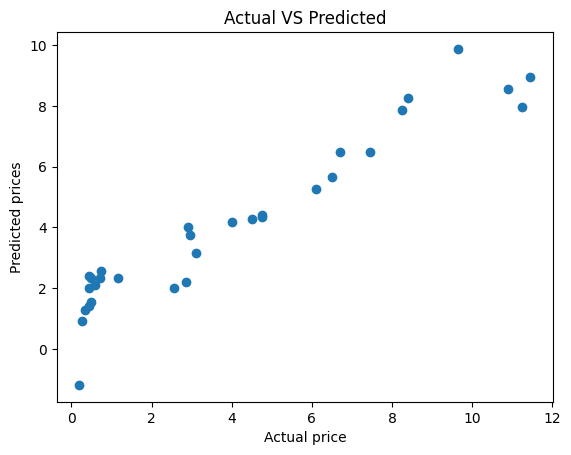

In [31]:
# Visualise the actual preices and predicted prices
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted prices")
plt.title("Actual VS Predicted")
plt.show()

In [39]:
lsr_model.predict(pd.DataFrame([[2011,5.50,60000,0,1,0,0]], columns=['Year',  'Present_Price',  'Kms_Driven',  'Fuel_Type',  'Seller_Type',  'Transmission','Owner']))


array([2.52786482])